In [1]:
import networkx as nx
import numpy as np
import pandas as pd

# build graph

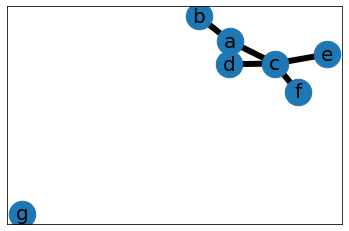

In [2]:
G = nx.Graph()

G.add_edge("a", "b")
G.add_edge("a", "c")
G.add_edge("c", "d")
G.add_edge("c", "e")
G.add_edge("c", "f")
G.add_edge("a", "d")
G.add_node("g")

pos = nx.spring_layout(G)  # positions for all nodes

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=G.edges, width=6)

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif");

In [16]:
nodelist = list(G)
# to array
M = nx.to_numpy_array(G, nodelist=nodelist, weight=None)
N = len(G)
# calc teleport
p = np.repeat(1.0 / N, N)
dangling_weights = p

dangling_nodes = np.where(M.sum(axis=1) == 0)[0]
for node in dangling_nodes:
    M[node] = dangling_weights
M /= M.sum(axis=1).reshape(-1, 1)  # Normalize rows to sum to 1

alpha = 0.5
googleM = alpha * M + (1 - alpha) * p

pd.DataFrame(googleM)

,0,1,2,3,4,5,6
0,0.071429,0.238095,0.238095,0.238095,0.071429,0.071429,0.071429
1,0.571429,0.071429,0.071429,0.071429,0.071429,0.071429,0.071429
2,0.196429,0.071429,0.071429,0.196429,0.196429,0.196429,0.071429
3,0.321429,0.071429,0.321429,0.071429,0.071429,0.071429,0.071429
4,0.071429,0.071429,0.571429,0.071429,0.071429,0.071429,0.071429
5,0.071429,0.071429,0.571429,0.071429,0.071429,0.071429,0.071429
6,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857


In [17]:
M

array([[0.        , 0.33333333, 0.33333333, 0.33333333, 0.        ,
        0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.25      , 0.        , 0.        , 0.25      , 0.25      ,
        0.25      , 0.        ],
       [0.5       , 0.        , 0.5       , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
        0.14285714, 0.14285714]])